In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

Load dataset
===============

In [2]:
cc = pd.read_csv("../dataset/credit_default_train.csv")
cc.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,NaN,25,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,-1,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,-1,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


In [3]:
cc.shape[0]

10000

In [4]:
cc.describe()

,limit,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,167197.000000,32.020200,-0.004000,-0.127800,-0.175700,-0.234300,-0.263700,-0.297400,51490.704100,49239.438400,46957.46680,43306.114300,40182.130200,38621.582700,5651.344900,5.973676e+03,5131.898600,4719.769200,4734.702900,5480.147400
std,128975.488596,13.843119,1.132834,1.200921,1.193554,1.169333,1.147386,1.147295,73740.383345,70777.470286,68948.62697,64519.910263,60732.330157,59325.339137,15835.839092,2.251175e+04,15416.402957,14483.407778,14912.375475,19361.411204
min,10000.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-69777.000000,-61506.00000,-24303.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,26.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3545.250000,2899.250000,2442.50000,2203.250000,1650.000000,1150.000000,997.000000,7.800000e+02,390.000000,261.500000,200.000000,100.000000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22246.000000,21202.000000,19905.50000,19072.000000,18071.000000,16977.000000,2081.500000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67681.000000,64412.750000,60164.75000,54093.750000,49906.500000,48680.750000,5019.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,780000.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,605943.000000,597415.00000,616836.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,417588.000000,292962.000000,417990.000000,528666.000000


In [5]:
cc.isnull().sum()

limit                0
sex                100
education          127
status            1822
age                  0
ps-sep               0
ps-aug               0
ps-jul               0
ps-jun               0
ps-may               0
ps-apr               0
ba-sep               0
ba-aug               0
ba-jul               0
ba-jun               0
ba-may               0
ba-apr               0
pa-sep               0
pa-aug               0
pa-jul               0
pa-jun               0
pa-may               0
pa-apr               0
credit_default       0
dtype: int64

Data understanding
===============

Sex
--------

In [70]:
cc['sex'].describe()

count       9900
unique         2
top       female
freq        6032
Name: sex, dtype: object

In [6]:
cc['sex'].unique()

array(['male', 'female', nan], dtype=object)

In [7]:
cc.isnull().sum()['sex']

100

In [8]:
sex_default = pd.crosstab(cc['sex'], cc['credit_default'])
sex_default

credit_default,no,yes
sex,,
female,4803,1229
male,2904,964


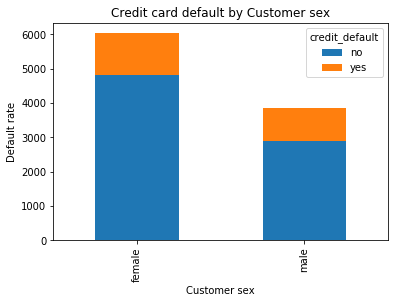

In [44]:
sex_default.plot(kind='bar', stacked=True, title='Credit card default by Customer sex')
plt.xlabel('Customer sex')
plt.ylabel('Default rate')
plt.show()

In [9]:
sex_default_norm = sex_default.div(sex_default.sum(1).astype(float), axis=0)
sex_default_norm

credit_default,no,yes
sex,,
female,0.796253,0.203747
male,0.750776,0.249224


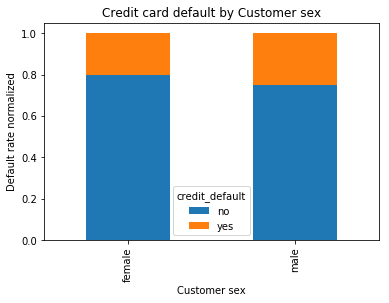

In [64]:
sex_default_norm.plot(kind='bar', stacked=True, title='Credit card default by Customer sex')
plt.xlabel('Customer sex')
plt.ylabel('Default rate normalized')
plt.show()

Education
--------

In [71]:
cc['education'].describe()

count           9873
unique             4
top       university
freq            4685
Name: education, dtype: object

In [11]:
cc['education'].unique()

array(['graduate school', 'university', 'high school', nan, 'others'],
      dtype=object)

In [12]:
cc.isnull().sum()['education']

127

In [13]:
education_default = pd.crosstab(cc['education'], cc['credit_default'])
education_default

credit_default,no,yes
education,,
graduate school,2813,667
high school,1286,386
others,34,2
university,3534,1151


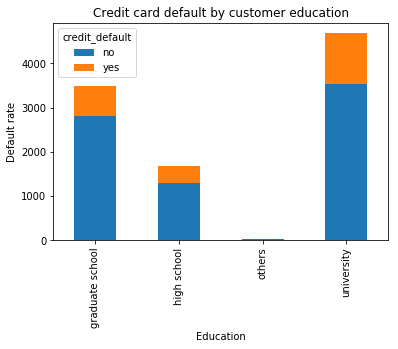

In [43]:
education_default.plot(kind='bar', stacked=True, title='Credit card default by customer education')
plt.xlabel('Education')
plt.ylabel('Default rate')
plt.show()

In [14]:
education_default_norm = education_default.div(education_default.sum(1).astype(float), axis=0)
education_default_norm

credit_default,no,yes
education,,
graduate school,0.808333,0.191667
high school,0.769139,0.230861
others,0.944444,0.055556
university,0.754322,0.245678


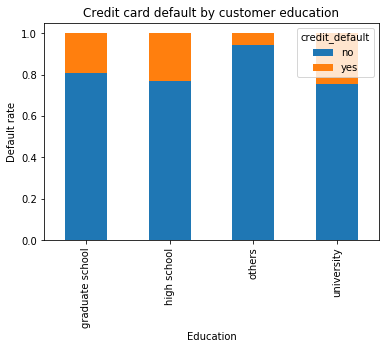

In [63]:
education_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer education')
plt.xlabel('Education')
plt.ylabel('Default rate normalized')
plt.show()

Status
--------

In [72]:
cc['status'].describe()

count       8178
unique         3
top       single
freq        4346
Name: status, dtype: object

In [16]:
cc['status'].unique()

array([nan, 'married', 'single', 'others'], dtype=object)

In [17]:
cc.isnull().sum()['status']

1822

In [18]:
status_default = pd.crosstab(cc['status'], cc['credit_default'])
status_default

credit_default,no,yes
status,,
married,2888,869
others,50,25
single,3458,888


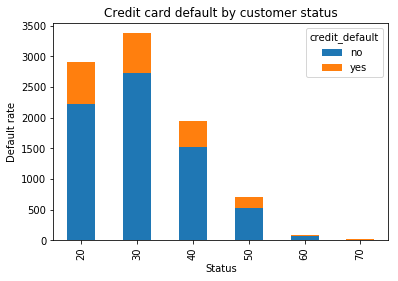

In [42]:
status_default.plot(kind='bar', stacked=True, title='Credit card default by customer status')
plt.xlabel('Status')
plt.ylabel('Default rate')
plt.show()

In [19]:
status_default_norm = status_default.div(status_default.sum(1).astype(float), axis=0)
status_default_norm

credit_default,no,yes
status,,
married,0.768698,0.231302
others,0.666667,0.333333
single,0.795674,0.204326


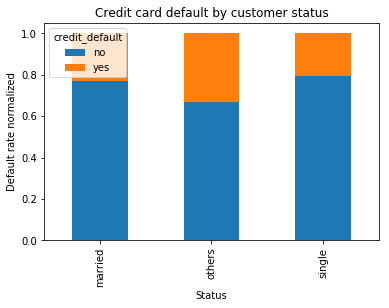

In [65]:
status_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer status')
plt.xlabel('Status')
plt.ylabel('Default rate normalized')
plt.show()

Age
--------

In [21]:
ages = cc['age'].copy()
ages.describe()

count    10000.000000
mean        32.020200
std         13.843119
min         -1.000000
25%         26.000000
50%         33.000000
75%         40.000000
max         75.000000
Name: age, dtype: float64

In [22]:
ages_unique = ages.unique()
ages_unique.sort()
ages_unique

array([-1, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 75])

In [23]:
len(ages_unique)

55

In [77]:
ages_invalid = cc[cc['age']==-1]
ages_invalid.shape[0]

951

In [25]:
ages_valid = cc[cc['age']>0]
ages_valid.shape[0]

9049

In [27]:
ages_valid['age'].describe()

count    9049.000000
mean       35.490441
std         9.226539
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        75.000000
Name: age, dtype: float64

In [37]:
ages_default = pd.crosstab(ages_valid['age']//10*10, ages_valid['credit_default'])
ages_default

credit_default,no,yes
age,,
20,2226,679
30,2724,655
40,1519,432
50,528,184
60,63,27
70,8,4


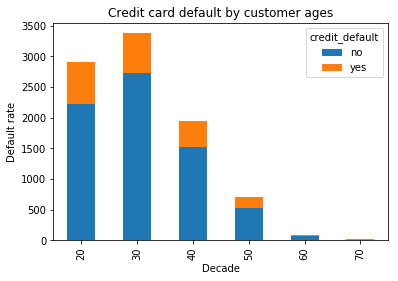

In [41]:
ages_default.plot(kind='bar', stacked=True, title='Credit card default by customer ages')
plt.xlabel('Decade')
plt.ylabel('Default rate')
plt.show()

In [74]:
ages_default_norm = status_default.div(ages_default.sum(1).astype(float), axis=0)
ages_default_norm

credit_default,no,yes
age,,
20,0.766265,0.233735
30,0.806156,0.193844
40,0.778575,0.221425
50,0.741573,0.258427
60,0.700000,0.300000
70,0.666667,0.333333


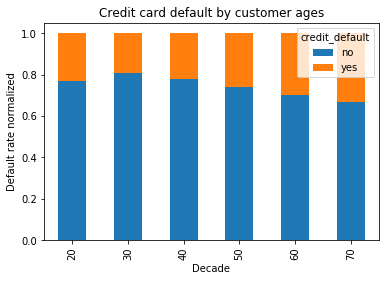

In [75]:
ages_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer ages')
plt.xlabel('Decade')
plt.ylabel('Default rate normalized')
plt.show()

Limit
--------

In [45]:
limits = cc['limit'].copy()
limits.describe()

count     10000.000000
mean     167197.000000
std      128975.488596
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      780000.000000
Name: limit, dtype: float64

In [46]:
limits_unique = limits.unique()
limits_unique.sort()
limits_unique

array([ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,
        90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,
       170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000,
       250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000,
       330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000,
       410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000,
       490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000,
       570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000,
       650000, 660000, 680000, 700000, 710000, 740000, 750000, 780000])

In [47]:
len(limits_unique)

72

In [57]:
limits_default = pd.crosstab(cc['limit']//50000*50000, cc['credit_default'])
limits_default

credit_default,no,yes
limit,,
0,878,545
50000,1754,633
100000,1014,289
150000,969,211
200000,1126,236
250000,571,89
300000,434,56
350000,426,75
400000,210,30


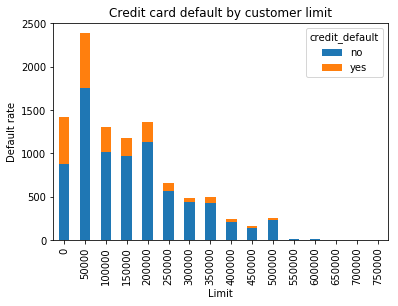

In [58]:
limits_default.plot(kind='bar', stacked=True, title='Credit card default by customer limit')
plt.xlabel('Limit')
plt.ylabel('Default rate')
plt.show()

In [59]:
limits_default_norm = limits_default.div(limits_default.sum(1).astype(float), axis=0)
limits_default_norm

credit_default,no,yes
limit,,
0,0.617006,0.382994
50000,0.734814,0.265186
100000,0.778204,0.221796
150000,0.821186,0.178814
200000,0.826725,0.173275
250000,0.865152,0.134848
300000,0.885714,0.114286
350000,0.850299,0.149701
400000,0.875000,0.125000


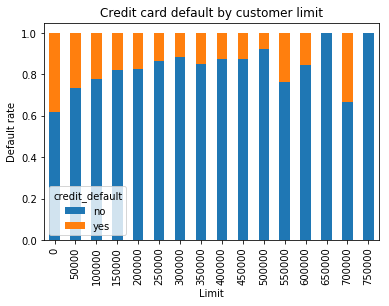

In [61]:
limits_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer limit')
plt.xlabel('Limit')
plt.ylabel('Default rate')
plt.show()